In [1]:
%matplotlib inline

import numpy as np

import time
#from car_met_hast_STU import car_lik
import math
from numpy.linalg import inv
import matplotlib
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import laplace
from scipy.optimize import minimize
from scipy import integrate
from scipy.optimize import minimize
from scipy.misc import derivative
from matplotlib import pyplot as plt


ln(p) = ln p*(x0) = 1/2*A(x-x0)^2 (Taylor)
Donde A = -(d^2/dx^2)*ln(p*)|x0
q(x) = (A(2*Pi))^(1/2)*exp(-A/2*(x-x0)^2)  (A = 1/sigma^2 en la dist. normal)

Ejercicio P(x) directamente proporcional a exp(-x^2/2 sigma(20x + 4))
sigma(x) = (1+exp(-x))-1 (sigmoid fuction)


1.451189367555508


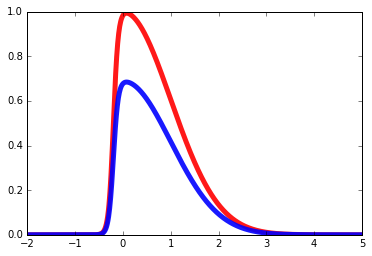

In [2]:
sigma = lambda x: (1 + np.exp(-x))**-1
P = lambda x: np.exp((-x**2)/2)*sigma(20*x + 4)
x = np.linspace(-2, 5, 1000)
plt.plot(x, P(x),'r-', lw=5, alpha=0.9, label='laplace pdf')
P_integral = integrate.quad(P, -2, 7)[0]
print(P_integral)
P_normed = lambda x: P(x)/P_integral
plt.plot(x, P_normed(x),'b-', lw=5, alpha=0.9, label='laplace pdf')

In [3]:
x_init = 1
P_neg = lambda x: -1*P(x)
x_0 = minimize(P_neg,x_init)['x'][0]
print(x_0)

0.0774795269342


In [4]:
P_log = lambda x: np.log(P(x))
P_log_manual = lambda x: -x**2/2 + np.log(sigma(20*x + 4))
A = -1*derivative(P_log,x_0, n=2, dx=0.205e-7)
print(A)

2.65832699234


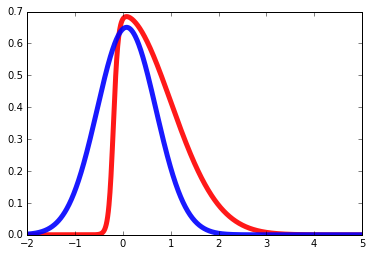

In [5]:
x = np.linspace(-2, 5, 1000)
q = lambda x: (A/2*np.pi)**(1/2)*np.exp(-1*(A/2)*(x-x_0)**2)
q_integral = integrate.quad(q, -2, 7)[0]
q_normed = lambda x: q(x)/q_integral
plt.plot(x, P_normed(x),'r-', lw=5, alpha=0.9, label='laplace pdf')
plt.plot(x, q_normed(x),'b-', lw=5, alpha=0.9, label='laplace pdf')